In [2]:
import trueskill
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
import operator
import copy
import pickle
from random import shuffle

In [3]:
# set up trueskills global environment
mu=25.000
sigma=8.333
beta=4.167
tau=0
draw_probability=0
trueskill.setup(mu=mu, sigma=sigma, beta=beta, tau=tau, draw_probability=draw_probability, backend=None)

trueskill.TrueSkill(mu=25.000, sigma=8.333, beta=4.167, tau=0.000, draw_probability=0.0%)

In [4]:
def win_probability(player1, player2):

    delta_mu = player1.mu - player2.mu
    sum_sigma = player1.sigma ** 2 + player2.sigma ** 2
    denom = math.sqrt(2 * (beta * beta) + sum_sigma)
    ts = trueskill.global_env()
    
    return ts.cdf(delta_mu / denom)

In [5]:
def create_student_ratings(n, mu_min, mu_max):
    
    n = n
    mu_min = mu_min
    mu_max = mu_max
    student_ratings = {}
    ind = 1
    for i in range(1,n+1):
        for j in range(3):
            student_ratings[ind] = trueskill.Rating(mu = mu_min + (mu_max - mu_min)/n * i, sigma = j+1)
            ind += 1
            
    return student_ratings

In [6]:
def get_match_outcome(student_ratings, question_rating):
    
    match_outcome =[]
    for student in student_ratings:
        if np.random.uniform() <= win_probability(student_ratings[student], question_rating):
            match_outcome.append((student, 'question'))
        else:
            match_outcome.append(('question', student))
    
    return match_outcome

In [7]:
def plot_covergence(student_ratings, question_rating):
    
    match_outcome = get_match_outcome(student_ratings, question_rating)  
    shuffle(match_outcome)
    
    simulation_rating = trueskill.Rating()
    simulation_rating_mu = [simulation_rating.mu]

    for match in match_outcome:
        if match[0] == 'question':
            simulation_rating, discard = trueskill.rate_1vs1(simulation_rating, student_ratings[match[1]])
        else:
            discard, simulation_rating = trueskill.rate_1vs1(student_ratings[match[0]], simulation_rating)
    
        simulation_rating_mu.append(simulation_rating.mu)
    
    number_of_matches = list(range(len(simulation_rating_mu)))
    plt.plot(number_of_matches, simulation_rating_mu)
    
    real_rating = question_rating.mu
    print("Actual question rating: " + str(real_rating))
    plt.axhline(y = real_rating, color = 'r', linestyle = '-')
    plt.xlabel('No. of students who answered the question')
    plt.ylabel('Rating of question')
    plt.show  
    plt.savefig('graph.png')

Actual question rating: 27.999999999999996


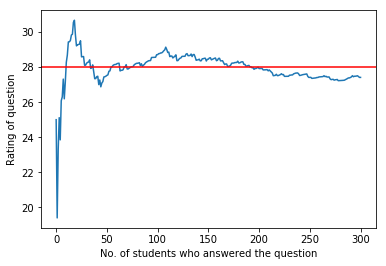

In [15]:
question_rating = trueskill.Rating(mu = 28, sigma = 1.5)
student_ratings = create_student_ratings(100, 10, 30)
plot_covergence(student_ratings, question_rating)

## As you can see, whether we can converge to true question rating depends on ratings of the students, i.e the match quality. Ideally, the students pitted against the question should be dynamic; the rating of the students should be 'close' enough to the current rating of the question so that we can converge to the true rating.